In [ ]:
# carregar pacotes necessarios
using LinearAlgebra
using Plots
using Random

In [ ]:
# gerar n pontos aleatorios em [0,1] x [0,1]
n = 10
X = rand(2,n)

2×10 Matrix{Float64}:
 0.523757  0.705588  0.414721  0.504836  …  0.415208  0.72596   0.405222
 0.446009  0.540113  0.592613  0.410231     0.154453  0.049043  0.895462

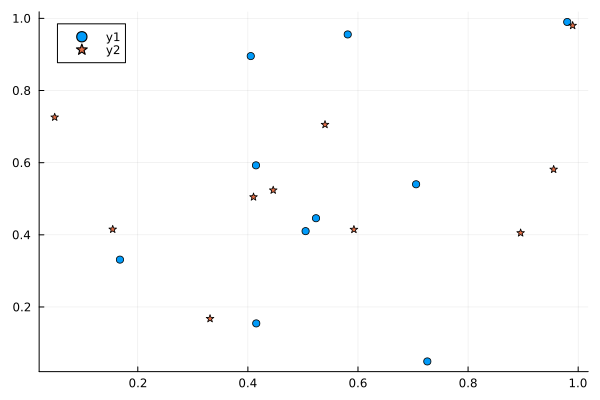

In [ ]:
# plotando os pontos acima
gr() # interface grafica
scatter(X[1,:],X[2,:])
scatter!(X[2,:],X[1,:],markershape=:star)

In [ ]:
X[1,:]

10-element Vector{Float64}:
 0.523757295984581
 0.7055883620236743
 0.41472095959582767
 0.5048355249419708
 0.5813628525156087
 0.9801593945970998
 0.16759228236967172
 0.41520836887774215
 0.725959573458627
 0.405221886243911

In [ ]:
# funcao para calculcar a matriz de distancias ao quadrado dado um conjunto de pontos
function matdis(X)
  # as colunas de X sao os pontos em R^d. ie, X e' d x n
  d, n = size(X)
  D = zeros(n,n)
  for i=1:n
    for j=(i+1):n
        D[i,j] = norm(X[:,i] - X[:,j])^2
        D[j,i] = D[i,j]
    end
  end
  return D
end

matdis (generic function with 1 method)

In [ ]:
matdis(X)

10×10 Matrix{Float64}:
 0.0         0.0419181  0.0333814  …  0.0967878  0.198468  0.216058
 0.0419181   0.0        0.08736       0.233054   0.241565  0.216493
 0.0333814   0.08736    0.0           0.191984   0.392337  0.091808
 0.00163811  0.057171   0.0413836     0.0734554  0.179353  0.245372
 0.262871    0.187955   0.159437      0.669239   0.842523  0.0346269
 0.504194    0.277759   0.477612   …  1.01725    0.949958  0.339485
 0.140025    0.333067   0.129387      0.0925678  0.39141   0.374813
 0.0967878   0.233054   0.191984      0.0        0.107678  0.549194
 0.198468    0.241565   0.392337      0.107678   0.0       0.819298
 0.216058    0.216493   0.091808      0.549194   0.819298  0.0

In [ ]:
# matriz de centralizacao
J = I - (1/n)*ones(n,n)

10×10 Matrix{Float64}:
  0.9  -0.1  -0.1  -0.1  -0.1  -0.1  -0.1  -0.1  -0.1  -0.1
 -0.1   0.9  -0.1  -0.1  -0.1  -0.1  -0.1  -0.1  -0.1  -0.1
 -0.1  -0.1   0.9  -0.1  -0.1  -0.1  -0.1  -0.1  -0.1  -0.1
 -0.1  -0.1  -0.1   0.9  -0.1  -0.1  -0.1  -0.1  -0.1  -0.1
 -0.1  -0.1  -0.1  -0.1   0.9  -0.1  -0.1  -0.1  -0.1  -0.1
 -0.1  -0.1  -0.1  -0.1  -0.1   0.9  -0.1  -0.1  -0.1  -0.1
 -0.1  -0.1  -0.1  -0.1  -0.1  -0.1   0.9  -0.1  -0.1  -0.1
 -0.1  -0.1  -0.1  -0.1  -0.1  -0.1  -0.1   0.9  -0.1  -0.1
 -0.1  -0.1  -0.1  -0.1  -0.1  -0.1  -0.1  -0.1   0.9  -0.1
 -0.1  -0.1  -0.1  -0.1  -0.1  -0.1  -0.1  -0.1  -0.1   0.9

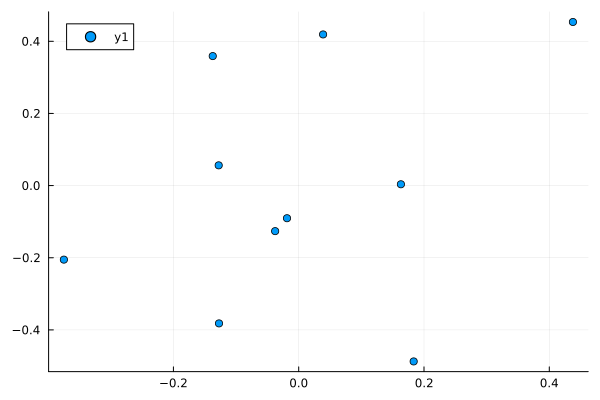

In [ ]:
Xc = X*J;
scatter(Xc[1,:],Xc[2,:])

In [ ]:
D = matdis(X)
G = -(J*D*J)./2
G = (G+G')./2 # simetrizando para evitar propagacao de erros

10×10 Matrix{Float64}:
  0.00853051  -0.00337853  …   0.0369302    0.0406588  -0.0299084
 -0.00337853   0.0266305      -0.022153     0.0281604  -0.0210757
 -0.00269279  -0.0206321      -0.00520039  -0.0508084   0.0376842
  0.0121202   -0.00659625      0.0530052    0.0546252  -0.0401564
 -0.0386274    0.00788053     -0.165018    -0.197091    0.145085
 -0.0491984    0.0730693   …  -0.228935    -0.140718    0.102747
  0.0255658   -0.0619052       0.126088     0.0312357  -0.0222378
  0.0369302   -0.022153        0.162118     0.162848   -0.119683
  0.0406588    0.0281604       0.162848     0.271255   -0.200166
 -0.0299084   -0.0210757      -0.119683    -0.200166    0.147711

In [ ]:
E = eigen(G,sortby=-)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
10-element Vector{Float64}:
  1.0323834512726298
  0.3776538258590185
  1.3322676295501878e-15
  3.605445438865026e-17
  1.9897803135448455e-17
  3.5478507149379246e-18
  2.5603746942482692e-18
 -4.934383812785329e-18
 -1.6706681327666525e-17
 -1.7759592387886016e-17
vectors:
10×10 Matrix{Float64}:
 -0.0901591   0.0191589    0.0389572  …  -0.147334   -0.0793726   0.0135755
  0.0556605   0.249091     0.0964596     -0.649169    0.35721    -0.479635
  0.0113424  -0.226255    -0.108287       0.295939    0.767331    0.0343051
 -0.129516    0.00899427   0.0474055     -0.242914   -0.231142   -0.23807
  0.402401   -0.162035    -0.209219       0.367279   -0.0693454  -0.74451
  0.56225     0.433301     0.0123658  …   0.0881061  -0.256233    0.0886538
 -0.311053   -0.468067    -0.11231       -0.188819   -0.201973   -0.216221
 -0.396253    0.0065582    0.135357       0.373798   -0.285476   -0.213049
 -0.394805    0.540522     0.3814

In [ ]:
la = E.values;
Q = E.vectors;

In [ ]:
Y = Diagonal(sqrt.(la[1:2]))*Q[:,1:2]'

2×10 Matrix{Float64}:
 -0.0916073  0.0565545   0.0115246  …  -0.402618    -0.401147   0.294792
  0.0117738  0.153075   -0.139042       0.00403024   0.33217   -0.246594

In [ ]:
DX = matdis(X);
DY = matdis(Y);
norm(DX - DY)

2.811195262531767e-15

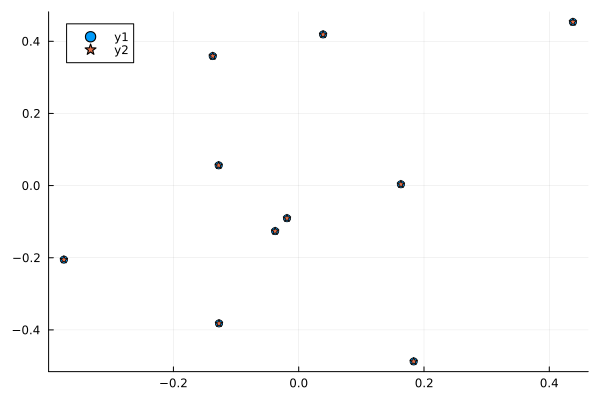

In [ ]:
Xc = X*J;
Yc = Y*J;
U, S, V = svd(Xc*Yc');
U = U*V';
Z = U*Yc;
scatter(Xc[1,:],Xc[2,:])
scatter!(Z[1,:],Z[2,:],markershape=:star)

In [ ]:
# dicas para Atividade 6
using LinearAlgebra
using SparseArrays

In [ ]:
n=1000;
d = 4*ones(n)
dl = -1*ones(n-1);
T = sparse(Tridiagonal(dl,d,dl))

1000×1000 SparseMatrixCSC{Float64, Int64} with 2998 stored entries:
⎡⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⎦

In [ ]:
m=10;
C = spdiagm(-n => -1*ones(n*(m-1)), n => -1*ones(n*(m-1)));
B = blockdiag([T for i=1:m]...);
A = B + C


10000×10000 SparseMatrixCSC{Float64, Int64} with 47980 stored entries:
⎡⠻⣦⡀⠀⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠈⠻⣦⡀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠙⢦⡀⠈⠻⣦⡀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠙⢦⡀⠈⠻⣦⡀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠙⢦⡀⠈⠻⣦⡀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠙⢦⡀⠈⠻⣦⡀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠈⠻⣦⡀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠈⠻⣦⡀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠈⠻⣦⡀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠈⠻⣦⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠻⣦⡀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠈⠻⣦⡀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠈⠻⣦⡀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠈⠻⣦⡀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠈⠻⣦⡀⠈⠳⣄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠈⠻⣦⡀⠈⠳⣄⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠈⠻⣦⡀⠈⠳⣄⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠈⠻⣦⡀⠈⠳⣄⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠈⠻⣦⡀⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⠀⠈⠻⣦⎦

In [ ]:
nnz(A)/10^8

0.0004798

In [ ]:
e = ones(m*n);
@time b = A*e;

  0.000107 seconds (2 allocations: 78.172 KiB)


In [ ]:
AF = Matrix(A);

  0.274936 seconds (2 allocations: 78.172 KiB)


In [ ]:
@time b = AF*e;

  0.061644 seconds (2 allocations: 78.172 KiB)


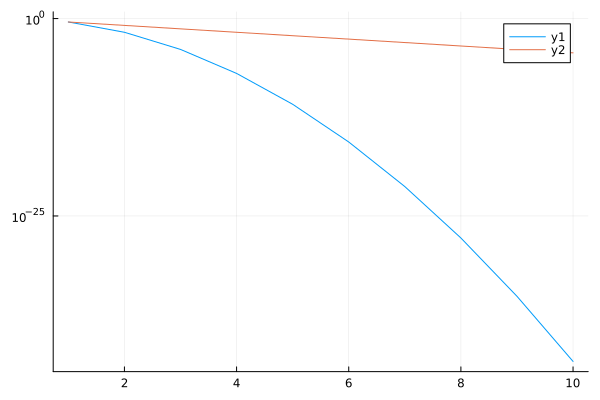

In [ ]:
using Plots
gr()
x = 1:10;
y = exp.(-x.^2);
z = exp.(-x);
plot(x,y,yscale=:log10)
plot!(x,z,yscale=:log10)